In [13]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from scipy.stats import randint
import optuna
from optuna.samplers import TPESampler
import lightgbm as lgb
import catboost as cb
import joblib
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.feature_extraction.text import TfidfVectorizer
pd.set_option('display.max_columns', 100)
%matplotlib inline
import os
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import StratifiedKFold
from datetime import datetime
import json
from sklearn.ensemble import RandomForestRegressor
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
import os


#paths
dev_file = 'Data_project/development.csv'
eval_file = 'Data_project/evaluation.csv'
sample_sub_file = 'Data_project/sample_submission.csv'


#Load the data


dev_df = pd.read_csv(dev_file)
eval_df = pd.read_csv(eval_file)
sample_submission_df = pd.read_csv(sample_sub_file)
display(dev_df.head())
print("\nEvaluation Set haed")
display(eval_df.head())



,id,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel,weekday
0,0,http://mashable.com/2014/09/08/safest-cabbies-...,121.0,12.0,1015.0,0.422018,1.0,0.545031,10.0,6.0,33.0,1.0,4.656158,4.0,-1.0,263.0,110.500000,6500.0,843300.0,398350.000000,1809.075,3483.806797,2729.047648,1100.0,22100.0,6475.0,0.331582,0.050050,0.050035,0.050000,0.518333,0.471175,0.159889,0.041379,0.008867,0.823529,0.176471,0.333534,0.100000,0.8,-0.160714,-0.50,-0.071429,0.0,0.00,0.5,0.00,2900,bus,tuesday
1,1,http://mashable.com/2013/07/25/3d-printed-rifle/,532.0,9.0,503.0,0.569697,1.0,0.737542,9.0,0.0,NaN,1.0,4.576541,10.0,4.0,3200.0,524.750000,0.0,843300.0,117960.000000,0.000,4228.114286,2387.526307,0.0,0.0,0.0,0.020007,0.020008,0.325602,0.020004,0.614379,0.477791,0.123520,0.033797,0.019881,0.629630,0.370370,0.419786,0.136364,1.0,-0.157500,-0.25,-0.100000,0.0,0.00,0.5,0.00,1300,tech,thursday
2,2,http://mashable.com/2013/10/30/digital-dinosau...,435.0,9.0,232.0,0.646018,1.0,0.748428,12.0,3.0,4.0,1.0,4.935345,6.0,4.0,939.0,198.666667,970.0,843300.0,573878.333333,954.500,6192.239067,4385.022237,1400.0,58800.0,30100.0,0.033334,0.033697,0.033333,0.866302,0.033333,0.522234,-0.163235,0.017241,0.043103,0.285714,0.714286,0.468750,0.375000,0.5,-0.427500,-1.00,-0.187500,0.0,0.00,0.5,0.00,17700,lifestyle,wednesday
3,3,http://mashable.com/2014/08/27/homer-simpson-i...,134.0,12.0,171.0,0.722892,1.0,0.867925,9.0,5.0,0.0,NaN,4.970760,6.0,-1.0,2100.0,444.166667,5600.0,843300.0,311033.333333,2076.520,4529.427500,3269.856640,974.0,5600.0,2574.8,0.700107,0.033335,0.033334,0.199402,0.033822,0.405128,-0.006410,0.011696,0.029240,0.285714,0.714286,0.500000,0.500000,0.5,-0.216667,-0.25,-0.166667,0.4,-0.25,0.1,0.25,1500,bus,wednesday
4,4,http://mashable.com/2013/01/10/creepy-robotic-...,728.0,11.0,286.0,0.652632,1.0,0.800000,5.0,2.0,NaN,0.0,5.006993,NaN,217.0,552.0,356.200000,0.0,28000.0,6830.125000,0.000,2240.536313,976.913444,822.0,822.0,822.0,0.214708,0.025062,0.025016,0.025187,0.710028,0.418036,0.060089,0.034965,0.024476,0.588235,0.411765,0.303429,0.100000,0.6,-0.251786,-0.50,-0.100000,0.2,-0.10,0.3,0.10,1400,tech,thursday



Evaluation Set haed


,id,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,data_channel,weekday
0,31715,http://mashable.com/2014/09/06/yao-ming-save-e...,122.0,12.0,606.0,0.492512,1.0,0.645161,12.0,9.0,3.0,0.0,4.813531,10.0,-1.0,309.0,73.800,37500.0,843300.0,380040.000000,1973.495210,4504.425620,3111.263580,968.0,3600.0,2147.2,0.445070,0.020001,0.020035,0.020147,0.494747,0.473733,0.062189,0.041254,0.019802,0.675676,0.324324,0.322359,0.033333,0.6,-0.334722,-0.8,-0.100000,0.6,-0.4,0.1,0.4,tech,monday
1,31716,http://mashable.com/2013/09/29/golf-tech-comic/,466.0,13.0,169.0,0.696429,1.0,0.814815,6.0,2.0,0.0,0.0,4.810651,10.0,4.0,2400.0,412.125,0.0,843300.0,139020.000000,0.000000,4101.929204,2510.996878,1000.0,1000.0,1000.0,0.020004,0.556085,0.020003,0.020066,0.383842,0.483333,0.175000,0.035503,0.005917,0.857143,0.142857,0.375000,0.100000,0.5,-0.500000,-0.5,-0.500000,0.1,0.1,0.4,0.1,tech,sunday
2,31717,http://mashable.com/2014/05/08/htc-one-m8-pric...,245.0,8.0,347.0,0.604167,1.0,0.669421,11.0,3.0,NaN,NaN,5.063401,NaN,-1.0,51.0,24.000,27300.0,843300.0,287100.000000,2590.298918,3587.938774,3147.473268,1200.0,2300.0,1750.0,0.050000,0.799818,0.050000,0.050181,0.050000,0.446795,0.086538,0.017291,0.008646,0.666667,0.333333,0.412500,0.250000,0.6,-0.533333,-0.7,-0.400000,1.0,0.6,0.5,0.6,entertainment,thursday
3,31718,http://mashable.com/2013/10/07/space-movies-as...,458.0,12.0,299.0,0.612245,1.0,0.759358,6.0,5.0,1.0,0.0,5.063545,NaN,4.0,503.0,154.250,3100.0,843300.0,391125.000000,1094.642857,3259.745585,2226.234882,609.0,6100.0,2458.0,0.360407,0.050278,0.050000,0.050000,0.489314,0.491375,0.145586,0.040134,0.016722,0.705882,0.294118,0.412102,0.062500,1.0,-0.220000,-0.4,-0.050000,1.0,0.0,0.5,0.0,bus,monday
4,31719,http://mashable.com/2013/02/27/waze-road-closed/,680.0,9.0,550.0,0.512821,1.0,0.670769,6.0,3.0,1.0,NaN,4.530909,6.0,217.0,416.0,307.000,0.0,80400.0,31583.333333,0.000000,2945.312989,2196.830479,1300.0,1600.0,1450.0,0.033419,0.033335,0.033340,0.033334,0.866573,0.419428,0.140861,0.049091,0.021818,0.692308,0.307692,0.345156,0.033333,1.0,-0.144610,-0.4,-0.071429,0.1,-0.1,0.4,0.1,tech,wednesday


In [14]:


#copy to avoid changing the original df
temp_df = dev_df.copy()

#weekday from the URL
date_str = temp_df['url'].str.extract(r'/(\d{4}/\d{2}/\d{2})/', expand=False)
temp_df['publish_date'] = pd.to_datetime(date_str)

#name of the day 0=Monday
day_names = {0: 'monday', 1: 'tuesday', 2: 'wednesday', 3: 'thursday', 4: 'friday', 5: 'saturday', 6: 'sunday'}
temp_df['calculated_weekday'] = temp_df['publish_date'].dt.dayofweek.map(day_names)

# comparing the columns
#removing any potential leading/trailing whitespace
mismatches = temp_df[temp_df['calculated_weekday'] != temp_df['weekday'].str.strip()]

print(f" {len(mismatches)} rows where week day does not match original 'weekday'  of the collumn")
display(mismatches[['url', 'weekday', 'calculated_weekday']].head(10))

 7599 rows where week day does not match original 'weekday'  of the collumn


,url,weekday,calculated_weekday
0,http://mashable.com/2014/09/08/safest-cabbies-...,tuesday,monday
5,http://mashable.com/2014/11/27/prank-cash-than...,monday,thursday
8,http://mashable.com/2014/07/28/three-out-of-pr...,tuesday,monday
9,http://mashable.com/2014/09/16/robot-cheetah-f...,wednesday,tuesday
11,http://mashable.com/2014/08/03/wrestlemania-30/,monday,sunday
21,http://mashable.com/2014/06/10/video-games-rui...,wednesday,tuesday
30,http://mashable.com/2014/09/15/hurricane-odile...,tuesday,monday
31,http://mashable.com/2014/11/18/powerlace/,wednesday,tuesday
32,http://mashable.com/2014/09/12/u2-album-itunes...,sunday,friday
41,http://mashable.com/2014/09/01/school-supplies...,tuesday,monday


In [15]:

################################PREPROCESSING SETUP###################################################à
TARGET = 'shares'
# LOG TRANSFORMATION
dev_df[TARGET] = np.log1p(dev_df[TARGET])

# X AND Y
y_dev = dev_df[TARGET]
X_dev = dev_df.drop(columns=['id', TARGET])
eval_ids = eval_df['id']
X_eval = eval_df.drop(columns=['id'])

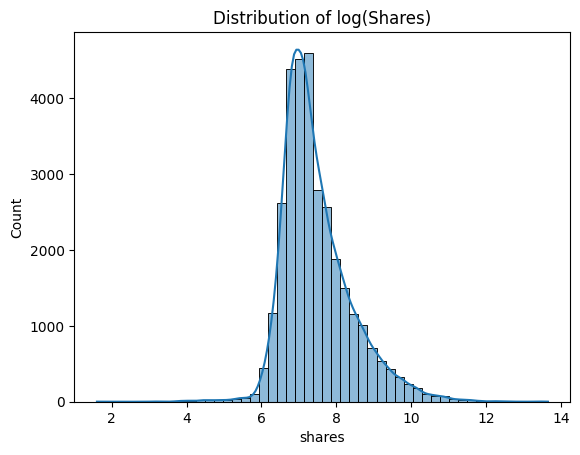

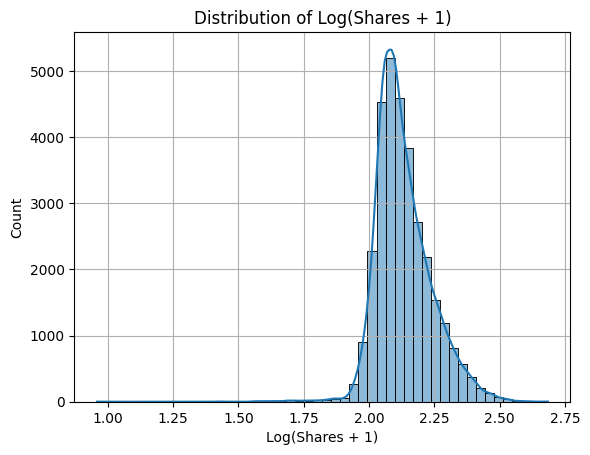

In [16]:
sns.histplot(dev_df['shares'], bins=50, kde=True)
plt.title('Distribution of log(Shares)')
plt.show()



#the histogram
sns.histplot(np.log1p(dev_df['shares']), bins=50, kde=True)
#label for the x-axis
plt.xlabel('Log(Shares + 1)')
# label for the y-axis for completeness
plt.ylabel('Count')
#grid
plt.grid(True)
#title
plt.title('Distribution of Log(Shares + 1)')
plt.show()

In [17]:

#######################PRE-PIPELINE FEATURE ENGINEERING


#feature engineering from the 'url' column. Creates time-based features and simple text features from the slug, to apply before pipeline

def feature_engineer_initial(df):

    df_copy = df.copy()
    epsilon = 1e-6
    date_str = df_copy['url'].str.extract(r'/(\d{4}/\d{2}/\d{2})/', expand=False)
    # these are the features realated with the date obtained with the string
    df_copy['publish_date'] = pd.to_datetime(date_str, errors='coerce')
    df_copy['publish_year'] = df_copy['publish_date'].dt.year
    df_copy['publish_month'] = df_copy['publish_date'].dt.month
    df_copy['publish_dayofmonth'] = df_copy['publish_date'].dt.day
    df_copy['publish_dayofweek'] = df_copy['publish_date'].dt.dayofweek


    #combine the channel and the day of the week into a new category
    if 'data_channel' in df_copy.columns:
        df_copy['channel_x_weekday'] = df_copy['data_channel'].astype(str) + '_' + df_copy['publish_dayofweek'].astype(str)

    # this new feature is redundant BUT FOR NOW  i dont eliminate it for now
    df_copy['is_weekend'] = df_copy['publish_dayofweek'].isin([5, 6]).astype(int)
    #Content quality indicators
    df_copy['ratio_tokens_non_stop_words'] = df_copy['n_tokens_content'] / (df_copy['n_non_stop_words'] + epsilon)


    #Social media potential features
    df_copy['clickbait_score'] = df_copy['title_subjectivity'] * df_copy['abs_title_sentiment_polarity']

    #Keyword features
    df_copy['kw_range'] = df_copy['kw_max_max'] - df_copy['kw_min_min']
    # the following one causes numerical problem because it is huge, I DONT ELIMINATE JUST TO BE SAFEE
    #df_copy['kw_consistency'] = df_copy['kw_max_avg'] / (df_copy['kw_min_avg'] + epsilon)


    df_copy['is_holiday_season'] = ((df_copy['publish_month'] == 12) |
                                   (df_copy['publish_month'] == 1)).astype(int)

    lda_cols = [col for col in df_copy.columns if col.startswith('LDA_')]
    if lda_cols: #if LDA columns exist
        df_copy['dominant_topic_idx'] = df_copy[lda_cols].idxmax(axis=1)
        # I ALSO SKIP THIS ONE SINCE IT COUSED PROBLEMS RUNNING IT
        # df_copy['dominant_topic_idx'] = df_copy[lda_cols].values.argmax(axis=1)




    df_copy['publish_weekofyear'] = df_copy['publish_date'].dt.isocalendar().week.astype(float)

    slug = df_copy['url'].str.split('/').str[-2]
    # KEEP THE SLUG COLUMN BUT LATER I ELIMINATE IT BECAUSE IT IS USELESS
    df_copy['slug'] = slug
    df_copy['publish_dayofyear'] = df_copy['publish_date'].dt.dayofyear.astype(float)
    df_copy['slug_topic_tech'] = slug.str.contains('tech|apple|google|facebook|microsoft', case=False).astype(int)
    df_copy['slug_topic_biz'] = slug.str.contains('business|stocks|market', case=False).astype(int)

    # relationship between slug and numbers in it
    df_copy['slug_len'] = slug.str.len().fillna(0) # Impute length of non-existent slugs with 0
    df_copy['slug_has_number'] = slug.str.contains(r'\d', na=False).astype(int) # na=False treats NaN as not containing a number
    df_copy['slug_ends_with_number'] = slug.str.endswith(tuple(str(i) for i in range(10))).astype(int)

    # 4-digit year from the slug, if it exists
    slug_year = slug.str.extract(r'(\b\d{4}\b)', expand=False).astype(float)

    # Compare it to the publish year
    df_copy['year_in_slug_matches_publish'] = (slug_year == df_copy['publish_year']).astype(int)
    #feature for just having a year in the slug
    df_copy['has_year_in_slug'] = slug_year.notna().astype(int)

    df_copy['num_slug_dashes'] = slug.str.count('-')

    #keywords in the URL
    df_copy['is_video_in_url'] = slug.str.contains('video', case=False).astype(int)
    df_copy['is_gallery_in_url'] = slug.str.contains('gallery|photo', case=False).astype(int)



    # HERE I PUT SOME RATIO, THEY WERE SUPPOSED TO BE IN THE FUNCTION BELOW BUT IT CREATED PROBLEMS SO THESE ARE HERE
    df_copy['average_token_length'] = df_copy['n_tokens_content'] / (df_copy['n_unique_tokens'] + epsilon)
    df_copy['imgs_per_word'] = df_copy['num_imgs'] / (df_copy['n_tokens_content'] + epsilon)
    df_copy['kw_avg_to_max_ratio'] = df_copy['kw_avg_avg'] / (df_copy['kw_max_avg'] + epsilon)




    # I REMOVE 'url', 'publish_date',"weekday" SINCE THEY ARE NO LOGER NEEDED AND THEY WOULD ONLY KEEP SPACE
    #AND BE USELESS IN THE TRAINING
    df_copy = df_copy.drop(columns=['url', 'publish_date',"weekday"])
    return df_copy



In [18]:
#Apply this transformation to both sets
X_dev = feature_engineer_initial(X_dev)
X_eval = feature_engineer_initial(X_eval)


In [19]:

#BINNING




#columns where the bin edges depend on the data distribution
 # i found them looking at he plot if they were appropriate
quantile_bin_cols = {
    'n_tokens_content': {'q': 4, 'labels': ['low', 'medium', 'high', 'very_high']},
    'num_hrefs': {'q': 4, 'labels': ['low_hrefs', 'medium_hrefs', 'high_hrefs', 'very_high_hrefs']},
    'num_self_hrefs': {'q': 4, 'labels': ['low', 'medium', 'high', 'very_high']},
    'kw_max_min': {'q': 4, 'labels': ['low', 'medium', 'high', 'very_high']},
    'kw_avg_min': {'q': 4, 'labels': ['low', 'medium', 'high', 'very_high']},
    'kw_max_avg': {'q': 4, 'labels': ['low', 'medium', 'high', 'very_high']},
    'self_reference_min_shares': {'q': 4, 'labels': ['low', 'medium', 'high', 'very_high']},
    'self_reference_max_shares': {'q': 4, 'labels': ['low', 'medium', 'high', 'very_high']},
    'self_reference_avg_sharess': {'q': 4, 'labels': ['low', 'medium', 'high', 'very_high']}
}

#learned bin edges
learned_bin_edges = {}

#bins from X_dev and apply them

for col, params in quantile_bin_cols.items():
    # qcut to calculate the bins AND store the bin edges
    X_dev[f'{col}_binned'], learned_bin_edges[col] = pd.qcut(
            X_dev[col],
            q=params['q'],
            labels=params['labels'],
            retbins=True,# returns the calculated bin edges
            duplicates='drop'
        )



#Apply the STORED bins to X_evall
for col, params in quantile_bin_cols.items():
    if col in learned_bin_edges:
        # Use cut (not qcut) with the bin edges we learned from X_dev
        X_eval[f'{col}_binned'] = pd.cut(
            X_eval[col],
            bins=learned_bin_edges[col],
            labels=params['labels'],
            include_lowest=True#include values on the edge
        )







#now apply fixed bins to both sets
# these values were obtained by looking at the distributions to decide the exact values to devide

static_bins_defs = {
    'kw_min_min_binned': {'col': 'kw_min_min', 'bins': [-20, -1, 20, float('inf')], 'labels': ['negative', 'small_positive', 'high']},
    'kw_min_max_binned': {'col': 'kw_min_max', 'bins': [-1, 0, 1400, 7800, float('inf')], 'labels': ['small', 'medium', 'high',"very_high"]},
    'kw_max_max_binned': {'col': 'kw_max_max', 'bins': [-1, 200000, 650000, 750000, float('inf')], 'labels': ['small', 'medium', 'high',"very_high"]},
    'kw_min_avg_binned': {'col': 'kw_min_avg', 'bins': [-10, 0, 1500, 2500, float('inf')], 'labels': ['small', 'medium', 'high',"very_high"]},
    'LDA_00_binned': {'col': 'LDA_00', 'bins': [-0.01, 0.075, 0.5, 0.75, 1.01], 'labels': ['very_small', 'small', 'medium', 'high']},
    'LDA_01_binned': {'col': 'LDA_01', 'bins': [-0.01, 0.075, 0.5, 0.75, 1.01], 'labels': ['very_small', 'small', 'medium', 'high']},
    'LDA_02_binned': {'col': 'LDA_02', 'bins': [-0.01, 0.075, 0.5, 0.75, 1.01], 'labels': ['very_small', 'small', 'medium', 'high']},
    'LDA_03_binned': {'col': 'LDA_03', 'bins': [-0.01, 0.075, 0.5, 0.75, 1.01], 'labels': ['very_small', 'small', 'medium', 'high']},
    'LDA_04_binned': {'col': 'LDA_04', 'bins': [-0.01, 0.075, 0.5, 0.75, 1.01], 'labels': ['very_small', 'small', 'medium', 'high']},
    'title_subjectivity_binned': {'col': 'title_subjectivity', 'bins': [-0.01, 0.075, 0.4, 0.79, 1.01], 'labels': ['very_small', 'small', 'medium', 'high']},
    'abs_title_sentiment_polarity_binned': {'col': 'abs_title_sentiment_polarity', 'bins': [-0.01, 0.075, 0.51, 1.01], 'labels': ['very_small', 'medium', 'high']}
}

for binned_col_name, definition in static_bins_defs.items():
    X_dev[binned_col_name] = pd.cut(X_dev[definition['col']], bins=definition['bins'], labels=definition['labels'])
    X_eval[binned_col_name] = pd.cut(X_eval[definition['col']], bins=definition['bins'], labels=definition['labels'])


#all new binned columns to category dtype
#find all columns that end with '_binned'
binned_column_names = [col for col in X_dev.columns if col.endswith('_binned')]
for col in binned_column_names:
    X_dev[col] = X_dev[col].astype('category')
    X_eval[col] = X_eval[col].astype('category')


In [20]:
X_dev.head(5)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,data_channel,publish_year,publish_month,publish_dayofmonth,publish_dayofweek,channel_x_weekday,is_weekend,ratio_tokens_non_stop_words,clickbait_score,kw_range,is_holiday_season,dominant_topic_idx,publish_weekofyear,slug,publish_dayofyear,slug_topic_tech,slug_topic_biz,slug_len,slug_has_number,slug_ends_with_number,year_in_slug_matches_publish,has_year_in_slug,num_slug_dashes,is_video_in_url,is_gallery_in_url,imgs_per_word,kw_avg_to_max_ratio,n_tokens_content_binned,num_hrefs_binned,num_self_hrefs_binned,kw_max_min_binned,kw_avg_min_binned,kw_max_avg_binned,self_reference_min_shares_binned,self_reference_max_shares_binned,self_reference_avg_sharess_binned,kw_min_min_binned,kw_min_max_binned,kw_max_max_binned,kw_min_avg_binned,LDA_00_binned,LDA_01_binned,LDA_02_binned,LDA_03_binned,LDA_04_binned,title_subjectivity_binned,abs_title_sentiment_polarity_binned
0,121.0,12.0,1015.0,0.422018,1.0,0.545031,10.0,6.0,33.0,1.0,2405.102999,4.0,-1.0,263.0,110.500000,6500.0,843300.0,398350.000000,1809.075,3483.806797,2729.047648,1100.0,22100.0,6475.0,0.331582,0.050050,0.050035,0.050000,0.518333,0.471175,0.159889,0.041379,0.008867,0.823529,0.176471,0.333534,0.100000,0.8,-0.160714,-0.50,-0.071429,0.0,0.00,0.5,0.00,bus,2014,9,8,0,bus_0,0,1014.998987,0.00,843301.0,0,LDA_04,37.0,safest-cabbies-nyc,251.0,0,0,18,0,0,0,0,2,0,0,0.032512,0.783352,very_high,high_hrefs,very_high,low,low,low,medium,very_high,very_high,negative,high,very_high,high,small,very_small,very_small,very_small,medium,very_small,very_small
1,532.0,9.0,503.0,0.569697,1.0,0.737542,9.0,0.0,NaN,1.0,882.923984,10.0,4.0,3200.0,524.750000,0.0,843300.0,117960.000000,0.000,4228.114286,2387.526307,0.0,0.0,0.0,0.020007,0.020008,0.325602,0.020004,0.614379,0.477791,0.123520,0.033797,0.019881,0.629630,0.370370,0.419786,0.136364,1.0,-0.157500,-0.25,-0.100000,0.0,0.00,0.5,0.00,tech,2013,7,25,3,tech_3,0,502.999499,0.00,843296.0,0,LDA_04,30.0,3d-printed-rifle,206.0,0,0,16,1,0,0,0,2,0,0,NaN,0.564679,high,high_hrefs,low,very_high,very_high,medium,low,low,low,small_positive,small,very_high,small,very_small,very_small,small,very_small,medium,very_small,very_small
2,435.0,9.0,232.0,0.646018,1.0,0.748428,12.0,3.0,4.0,1.0,359.122733,6.0,4.0,939.0,198.666667,970.0,843300.0,573878.333333,954.500,6192.239067,4385.022237,1400.0,58800.0,30100.0,0.033334,0.033697,0.033333,0.866302,0.033333,0.522234,-0.163235,0.017241,0.043103,0.285714,0.714286,0.468750,0.375000,0.5,-0.427500,-1.00,-0.187500,0.0,0.00,0.5,0.00,lifestyle,2013,10,30,2,lifestyle_2,0,231.999769,0.00,843296.0,0,LDA_03,44.0,digital-dinosaur-movements,303.0,0,0,26,0,0,0,0,2,0,0,0.017241,0.708148,low,high_hrefs,medium,high,medium,very_high,high,very_high,very_high,small_positive,medium,very_high,medium,very_small,very_small,very_small,high,very_small,very_small,very_small
3,134.0,12.0,171.0,0.722892,1.0,0.867925,9.0,5.0,0.0,NaN,236.549674,6.0,-1.0,2100.0,444.166667,5600.0,843300.0,311033.333333,2076.520,4529.427500,3269.856640,974.0,5600.0,2574.8,0.700107,0.033335,0.033334,0.199402,0.033822,0.405128,-0.006410,0.011696,0.029240,0.285714,0.714286,0.500000,0.500000,0.5,-0.216667,-0.25,-0.166667,0.4,-0.25,0.1,0.25,bus,2014,8,27,2,bus_2,0,170.999831,0.10,843301.0,0,LDA_00,35.0,homer-simpson-ice-bucket,239.0,0,0,24,

In [21]:

#FINAL FEATURE CREATION & PREPROCESSOR

#this next functioncreates all ratio and interaction features
#
def create_final_features(df):

    df_copy = df.copy()
    epsilon = 1e-6

    #RATIO FEATURES
    df_copy['videos_per_word'] =  df_copy['num_videos'] / (df_copy['n_tokens_content'] + epsilon)
    df_copy['token_diversity_rate'] =  df_copy['n_unique_tokens'] / (df_copy['n_tokens_content'] + epsilon)
    df_copy['non_stop_rate'] =  df_copy['n_non_stop_words'] / (df_copy['n_tokens_content'] + epsilon)
    df_copy['links_per_word'] =  df_copy['num_hrefs'] / (df_copy['n_tokens_content'] + epsilon)
    df_copy['content_to_title_ratio'] =  df_copy['n_tokens_content'] / (df_copy['n_tokens_title'] + epsilon)
    df_copy['image_to_video_ratio'] =  df_copy['num_imgs'] / (df_copy['num_videos'] + epsilon)




    #INTERACTION & OTHER FEATURES
    df_copy['kw_popularity_index'] = (df_copy['kw_avg_avg'] + df_copy['kw_max_avg'] + df_copy['kw_min_avg']) / 3
    df_copy['sentiment_x_length'] = df_copy['global_sentiment_polarity'] * df_copy['n_tokens_content']
    df_copy['self_ref_share_range'] = df_copy['self_reference_max_shares'] - df_copy['self_reference_min_shares']
    df_copy['kw_pop_x_subjectivity'] = df_copy['kw_popularity_index'] * df_copy['title_subjectivity']
    df_copy['links_x_weekend'] = df_copy['num_hrefs'] * df_copy['is_weekend']
    df_copy['sentiment_x_weekend'] = df_copy['global_sentiment_polarity'] * df_copy['is_weekend']
    df_copy['lda0_x_sentiment'] = df_copy['LDA_00'] * df_copy['global_sentiment_polarity']
    df_copy['lda1_x_subjectivity'] = df_copy['LDA_01'] * df_copy['global_subjectivity']

    #cyclical time
    # These are more precisee than just  month/day numbers
    df_copy['month_sin'] = np.sin(2 * np.pi * df_copy['publish_month']/12.0)
    df_copy['month_cos'] = np.cos(2 * np.pi * df_copy['publish_month']/12.0)
    df_copy['dayofweek_sin'] = np.sin(2 * np.pi * df_copy['publish_dayofweek']/7.0)
    df_copy['dayofweek_cos'] = np.cos(2 * np.pi * df_copy['publish_dayofweek']/7.0)
    df_copy['kw_avg_avg_x_is_tech'] = df_copy['kw_avg_avg'] * (df_copy['data_channel'] == 'tech').astype(int)
    df_copy['kw_avg_avg_x_is_world'] = df_copy['kw_avg_avg'] * (df_copy['data_channel'] == 'world').astype(int)

    #other general features that seem reasonable
    #high subjectivity matter more on weekends?
    df_copy['subjectivity_x_weekend'] = df_copy['title_subjectivity'] * df_copy['is_weekend']
    #isthe sentiment polarity more impactful for longer articles?
    df_copy['abs_title_sentiment_polarity_x_len'] = df_copy['abs_title_sentiment_polarity'] * df_copy['n_tokens_content']
    #number of images per 100 words
    df_copy['imgs_per_100_words'] = df_copy['num_imgs'] / (df_copy['n_tokens_content'] / 100 + epsilon)
    #mumber of links per 100 words
    df_copy['links_per_100_words'] = df_copy['num_hrefs'] / (df_copy['n_tokens_content'] / 100 + epsilon)
    #Ratio of hot keywords max to normal keywords min
    df_copy['hot_keyword_ratio'] = df_copy['kw_max_avg'] / (df_copy['kw_min_avg'] + epsilon)

    return df_copy




#final feature creation to both datasets
X_dev = create_final_features(X_dev)
X_eval = create_final_features(X_eval)



# FINAL COLUMN TYPES
numerical_features = X_dev.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_dev.select_dtypes(exclude=np.number).columns.tolist()
text_features = ['slug']
categorical_features.remove('slug')# this is not useful anymore

#polynomial features for the Ridge model
# these where obtained in the feature seleection using feature importance of lgbm model, that part i commentated
#since i already have here the
poly_features_list = [
    'timedelta', 'kw_avg_avg', 'kw_max_avg', 'publish_dayofyear', 'imgs_per_word',
    'kw_avg_max', 'LDA_03']

#  all poly features actually exist in the numerical list
poly_features_list = [f for f in poly_features_list if f in numerical_features]











#categorical features
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])



#TF-IDF features is from training data.
# The vectorizer is not pre-trained so it is possible to use it

#text features
text_pipeline = Pipeline(steps=[
    ('vectorizer', TfidfVectorizer(max_features=100, ngram_range=(1, 2)))
    #create features from both individual words and pairs of adjacent words so that "new york" has meaning
])

#Preprocessor for LGBM and CatBoost
#no scaling since in general is not needed for trees
# impute numerical features
preprocessor_trees = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_features),
        ('cat', cat_pipeline, categorical_features),
        ('text', text_pipeline, 'slug'),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)


#Preprocessor for Ridge
#now scale numerical and polynomial features
# OHE or TF-IDF are not scaled
preprocessor_ridge = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_features),

        #create and scale polynomial features
        ('poly', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('poly_creator', PolynomialFeatures(degree=2, include_bias=False)),
            ('poly_scaler', StandardScaler())
        ]), poly_features_list),

        # Categorical and text pipelines as stated above are not scaled
        ('cat', cat_pipeline, categorical_features),
        ('text', text_pipeline, 'slug'),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)


In [22]:

print("Categorical features ")
print(categorical_features)
print("\nNumerical features")
print(numerical_features)

Categorical features 
['data_channel', 'channel_x_weekday', 'dominant_topic_idx', 'n_tokens_content_binned', 'num_hrefs_binned', 'num_self_hrefs_binned', 'kw_max_min_binned', 'kw_avg_min_binned', 'kw_max_avg_binned', 'self_reference_min_shares_binned', 'self_reference_max_shares_binned', 'self_reference_avg_sharess_binned', 'kw_min_min_binned', 'kw_min_max_binned', 'kw_max_max_binned', 'kw_min_avg_binned', 'LDA_00_binned', 'LDA_01_binned', 'LDA_02_binned', 'LDA_03_binned', 'LDA_04_binned', 'title_subjectivity_binned', 'abs_title_sentiment_polarity_binned']

Numerical features
['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_a

In [23]:


# to be more efficient I decided to pretransform all the data before and not inside each of the k-fold


#fit the tree preprocessor on the FULL development data
preprocessor_trees.fit(X_dev)

#This matrix will be reused in Optuna
X_dev_trees_transformed = preprocessor_trees.transform(X_dev)

print(X_dev_trees_transformed.shape)


(31715, 324)


In [24]:
#RMSE if we predict a single constant on original scale
# THIS IS JUST A CHECK THAT I NEED TO COMPARE DURING AFTER TRAINING
y_true_all = np.expm1(y_dev)
const_pred = np.full_like(y_true_all, y_true_all.mean(), dtype=float)
baseline_rmse = np.sqrt(mean_squared_error(y_true_all, const_pred))
print(baseline_rmse)


11899.272617396875


In [25]:

#HYPERPARAMETER TUNING






# We create discrete bins from the continuous log-transformed target
# This ensures each fold has a similar distribution of low, medium, and high share articles.
y_dev_bins = pd.qcut(y_dev, q=10, labels=False, duplicates='drop')
# Using q=10 creates 10 bins (deciles). `duplicates='drop'` handles cases where
# the data is too skewed to create 10 unique bin edges.




#OPTUNA STUDY FUNCTION
def run_optuna_study(study_name, objective, n_trials):
    sampler = TPESampler(seed=5)
    study = optuna.create_study(
        direction='minimize',
        sampler=sampler,
        study_name=study_name,
        load_if_exists=True
    )
    study.optimize(
        objective,
        n_trials=n_trials,
        n_jobs=-1,
        show_progress_bar=True
    )
    print(f"Best trial's score RMSE {study.best_value}")
    for key, value in study.best_trial.params.items():
        best_params = study.best_trial.params
    if 'n_estimators_actual' in study.best_trial.user_attrs:
        actual_estimators = study.best_trial.user_attrs['n_estimators_actual']
        if 'iterations' in best_params:
             best_params['iterations'] = actual_estimators
        else:
             best_params['n_estimators'] = actual_estimators
    return best_params

TOTAL_TRIALS = 40

def objective_lgbm(trial):
    params = {
        'objective': 'regression_l2', 'metric': 'rmse', 'random_state': 5, 'n_jobs': -1,
        'boosting_type': 'gbdt',
        'n_estimators': 4000,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.08, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 300),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-2, 20.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-2, 20.0, log=True),
    }

    kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=5)
    oof_log_rmse_scores, best_iterations = [], []

    for train_index, val_index in kf.split(X_dev_trees_transformed, y_dev_bins):
        X_train, X_val = X_dev_trees_transformed[train_index], X_dev_trees_transformed[val_index]
        y_train, y_val = y_dev.iloc[train_index], y_dev.iloc[val_index]

        model = lgb.LGBMRegressor(**params)
        model.fit(
            X_train, y_train,
            eval_set=[(X_val, y_val)],
            eval_metric='rmse',
            callbacks=[lgb.early_stopping(100, verbose=False)]
        )

        # Store the best score (log-space RMSE) and iteration
        best_iterations.append(model.best_iteration_)
        oof_log_rmse_scores.append(model.best_score_['valid_0']['rmse'])

    avg_best_iteration = int(np.mean([bi for bi in best_iterations if bi is not None]))
    trial.set_user_attr('n_estimators_actual', avg_best_iteration)

    #return the log-space RMSE that the model was trained on
    final_score = float(np.mean(oof_log_rmse_scores))
    trial.set_user_attr('rmse_log_cv', final_score)
    return final_score





def objective_rf(trial):
    # RandomForest doesn't have early stopping, so we tune n_estimators
    #I use n_jobs=-1 to parallelize
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 700, step=50),
        'max_depth': trial.suggest_int('max_depth', 2, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 20),
        'max_features': trial.suggest_categorical('max_features',['sqrt', 0.5, 0.8]),
        'random_state': 5,
        'n_jobs': -1  # use all CPU
    }

    kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=5)
    oof_log_rmse_scores = []

    for train_index, val_index in kf.split(X_dev_trees_transformed, y_dev_bins):
        X_train, X_val = X_dev_trees_transformed[train_index], X_dev_trees_transformed[val_index]
        y_train, y_val = y_dev.iloc[train_index], y_dev.iloc[val_index]

        model = RandomForestRegressor(**params)
        model.fit(X_train, y_train)
        preds = model.predict(X_val)
        oof_log_rmse_scores.append(np.sqrt(mean_squared_error(y_val, preds)))

    final_score = float(np.mean(oof_log_rmse_scores))
    trial.set_user_attr('rmse_log_cv', final_score)
    return final_score





In [17]:

best_params_lgbm = run_optuna_study('lgbm_final_stable', objective_lgbm, TOTAL_TRIALS)


[I 2025-09-18 23:42:35,591] A new study created in memory with name: lgbm_final_stable


  0%|          | 0/40 [00:00<?, ?it/s]

: 

: 

In [ ]:
save_dir = 'Best_params_models'

#the directory


os.makedirs(save_dir, exist_ok=True)
lgbm_params_path = os.path.join(save_dir, 'best_params_lgbm.json')

with open(lgbm_params_path, 'w') as f:
    json.dump(best_params_lgbm, f, indent=4)

In [ ]:

best_params_rf = run_optuna_study('rf_cpu_final', objective_rf, TOTAL_TRIALS)

NameError: name 'run_optuna_study' is not defined

In [ ]:
rf_params_path = os.path.join(save_dir, 'best_params_rf.json')

with open(rf_params_path, 'w') as f:
    json.dump(best_params_rf, f, indent=4)


In [26]:





#Load pre-tuned parameters
# so that i can separate thee hyperparameter search with the training




save_dir = 'Best_params_models' 
models_to_load = ['lgbm', 'rf']

for model_name in models_to_load:
    file_path = os.path.join(save_dir, f'best_params_{model_name}.json')
    with open(file_path, 'r') as f:
        globals()[f'best_params_{model_name}'] = json.load(f)



In [ ]:
####### THIS WAS EXECUTED JUST ONCE ###################
# everything commentated so that i can ran all without problems








# THIS BLOCK WAS USED TO TRAIN A FINAL LGBM MODEL WITH THE BEST HYPERPARAMETERS FOUND ABOVE
# AND TAKEN THE TOP 7 FEATURES THAT WERE USED


#the final, optimized LGBM pipeline using the best hyperparameters
#final_lgbm_pipeline = Pipeline([
#   ('preprocessor', preprocessor_trees),
#    ('regressor', lgb.LGBMRegressor(**best_params_lgbm, random_state=5))
#])

#Train on the full development data to get stable importance scores
#final_lgbm_pipeline.fit(X_dev, y_dev)


# extract feature names and importances from the fitted pipeline
#
#now  access their fitted attributes

# get_feature_names is called on the preprocessor step of the pipeline
#feature_names = get_feature_names_updated(
#final_lgbm_pipeline.named_steps['preprocessor'],
#numerical_features
#)

# feature_importances_ are taken from the regressor step of the pipeline
#importances = final_lgbm_pipeline.named_steps['regressor'].feature_importances_

# Create the DataFrame for analysis
#feature_importance_df = pd.DataFrame({
#    'feature': feature_names,
#    'importance': importances
# }).sort_values('importance', ascending=False)
#  top 30 most important features
#pd.set_option('display.max_rows', 30)
##display(feature_importance_df.head(30))
#pd.reset_option('display.max_rows')


In [27]:

#fit the tree preprocessor and transform
preprocessor_trees.fit(X_dev)
X_dev_tree_transformed = preprocessor_trees.transform(X_dev)
X_eval_tree_transformed = preprocessor_trees.transform(X_eval)
print( X_dev_tree_transformed.shape)



#fit the linear preprocessor and transform
preprocessor_ridge.fit(X_dev)
X_dev_ridge_transformed = preprocessor_ridge.transform(X_dev)
X_eval_ridge_transformed = preprocessor_ridge.transform(X_eval)
print( X_dev_ridge_transformed.shape)

(31715, 324)
(31715, 359)


In [ ]:

#TRAIN FINAL ENSEMBLE MODEL




#instead of KFold as before i use StratifiedKFold

N_SPLITS = 5 #this is now for actual training, before i had 2 just to fasr check



kf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=5)

oof_preds_lgbm = np.zeros(X_dev.shape[0])
oof_preds_rf = np.zeros(X_dev.shape[0])
oof_preds_ridge = np.zeros(X_dev.shape[0])


eval_preds_lgbm = np.zeros(X_eval.shape[0])
eval_preds_rf = np.zeros(X_eval.shape[0])
eval_preds_ridge = np.zeros(X_eval.shape[0])


# I split on X_dev but use y_dev_bins to ensure the splits are stratified
for fold, (train_index, val_index) in enumerate(kf.split(X_dev, y_dev_bins)):

    X_train, X_val = X_dev.iloc[train_index], X_dev.iloc[val_index]
    y_train, y_val = y_dev.iloc[train_index], y_dev.iloc[val_index]



    #Tree models
    preprocessor_trees.fit(X_train)
    X_train_tree = preprocessor_trees.transform(X_train)
    X_val_tree = preprocessor_trees.transform(X_val)
    X_eval_tree = preprocessor_trees.transform(X_eval)



    lgbm = lgb.LGBMRegressor(**best_params_lgbm, random_state=5)
    lgbm.fit(X_train_tree, y_train, eval_set=[(X_val_tree, y_val)],
             callbacks=[lgb.early_stopping(100, verbose=False)])# 100 and then stop
    oof_preds_lgbm[val_index] = lgbm.predict(X_val_tree)
    eval_preds_lgbm += lgbm.predict(X_eval_tree) / N_SPLITS



    #Random Forest


    rf_model = RandomForestRegressor(**best_params_rf, random_state=5, n_jobs=-1)
    rf_model.fit(X_train_tree, y_train) #no early stopping
    oof_preds_rf[val_index] = rf_model.predict(X_val_tree)
    eval_preds_rf += rf_model.predict(X_eval_tree) / N_SPLITS





    #ridge model
    ridge_model = Pipeline(steps=[
        ('preprocessor', preprocessor_ridge),
        ('regressor', RidgeCV(alphas=np.logspace(-3, 3, 100)))
    ])
    ridge_model.fit(X_train, y_train)
    oof_preds_ridge[val_index] = ridge_model.predict(X_val)
    eval_preds_ridge += ridge_model.predict(X_eval) / N_SPLITS




[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.048831 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18590
[LightGBM] [Info] Number of data points in the train set: 25372, number of used features: 323
[LightGBM] [Info] Start training from score 7.476851
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.064241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18631
[LightGBM] [Info] Number of data points in the train set: 25372, number of used features: 323
[LightGBM] [Info] Start training from score 7.475770
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.057571 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18607
[LightGBM] [Info] Number of data points in the train set: 25372, number of used features: 323
[LightGBM] [Info] Start training from score 7.477170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.050517 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18511
[LightGBM] [Info] Number of data points in the train set: 25372, number of used features: 323
[LightGBM] [Info] Start training from score 7.476213
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.054524 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18675
[LightGBM] [Info] Number of data points in the train set: 25372, number of used features: 323
[LightGBM] [Info] Start training from score 7.475445
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [ ]:

########################### saves the essential outputs from the training process, so they can be
# reloaded later without needing to retrain the models.

#directory for these outputs
output_save_dir = 'Data_project/training_outputs' # Create this folder locally
os.makedirs(output_save_dir, exist_ok=True)

#Save OOF predictions for each model
# These are the predictions on the development set, used for local validation and to train the meta-model
np.save(os.path.join(output_save_dir, 'oof_preds_lgbm.npy'), oof_preds_lgbm)
np.save(os.path.join(output_save_dir, 'oof_preds_rf.npy'), oof_preds_rf)
np.save(os.path.join(output_save_dir, 'oof_preds_ridge.npy'), oof_preds_ridge)




#Save evaluation set predictions from each base model
np.save(os.path.join(output_save_dir, 'eval_preds_lgbm.npy'), eval_preds_lgbm)
np.save(os.path.join(output_save_dir, 'eval_preds_rf.npy'), eval_preds_rf)
np.save(os.path.join(output_save_dir, 'eval_preds_ridge.npy'), eval_preds_ridge)


In [32]:

#Load the saved model predictions on the development set
output_dir = 'training_outputs' 
oof_preds_lgbm = np.load(os.path.join(output_dir, 'oof_preds_lgbm.npy'))
oof_preds_rf = np.load(os.path.join(output_dir, 'oof_preds_rf.npy'))
oof_preds_ridge = np.load(os.path.join(output_dir, 'oof_preds_ridge.npy'))


# Evaluation set predictions
eval_preds_lgbm = np.load(os.path.join(output_dir, 'eval_preds_lgbm.npy'))
eval_preds_rf = np.load(os.path.join(output_dir, 'eval_preds_rf.npy'))
eval_preds_ridge = np.load(os.path.join(output_dir, 'eval_preds_ridge.npy'))


In [33]:




# OOF ON RMSLE, It's the RMSE between the log-transformed true values and the log-transformed predictions

rmsle_lgbm = np.sqrt(mean_squared_error(y_dev, oof_preds_lgbm))
rmsle_rf = np.sqrt(mean_squared_error(y_dev, oof_preds_rf))
rmsle_ridge = np.sqrt(mean_squared_error(y_dev, oof_preds_ridge))


print(f"LGBM oof RMSLE {rmsle_lgbm}")
print(f"Random Forest oof RMSLE: {rmsle_rf}")
print(f"Ridge oof RMSLE:    {rmsle_ridge}")

#OOF Performance on Original Scale RMSE
#it's heavily skewed by outliers.
y_dev_original = np.expm1(y_dev)
oof_preds_lgbm_orig = np.expm1(oof_preds_lgbm)
oof_preds_rf_orig = np.expm1(oof_preds_rf)
oof_preds_ridge_orig = np.expm1(oof_preds_ridge)

#clip negative predictions, which can come from linear models
oof_preds_ridge_orig[oof_preds_ridge_orig < 0] = 0

rmse_lgbm = np.sqrt(mean_squared_error(y_dev_original, oof_preds_lgbm_orig))
rmse_rf = np.sqrt(mean_squared_error(y_dev_original, oof_preds_rf_orig))
rmse_ridge = np.sqrt(mean_squared_error(y_dev_original, oof_preds_ridge_orig))



print(f"LGBM OOF RMSE {rmse_lgbm}")
print(f"RF OOF RMSE {rmse_rf}")
print(f"Ridge OOF RMSE{rmse_ridge}")


LGBM oof RMSLE 0.8410202192837577
Random Forest oof RMSLE: 0.8469335704078778
Ridge oof RMSLE:    0.8563794260223281
LGBM OOF RMSE 11900.41605567388
RF OOF RMSE 11916.23807723535
Ridge OOF RMSE11917.676201621694


In [34]:

# ENSEMBLE WITH WEIGHTED AVERAGE


##################### this part finds the optimal weights


# rmse function
rmse = lambda a,b: np.sqrt(mean_squared_error(a,b))

# Define the function to minimize: RMSE of the weighted average on the log-transformed OOF predictions.

# this function calculates the RMSLE for a weighted average of predictions,
# using the list of OOF prediction arrays
# list of weights corresponding to the predictions
def rmsle_objective(weights, y_true, predictions):


    # Calculate the weighted average of predictions
    weighted_preds = np.zeros_like(y_true, dtype=float)
    for w, p in zip(weights, predictions):
        weighted_preds += w * p

    #it's the RMSE, but really it is the RMSLE since we are in log space
    return rmse(y_true, weighted_preds)





#list of the Out-of-Fold  predictions from each base model
oof_predictions_list = [oof_preds_lgbm, oof_preds_rf, oof_preds_ridge]
model_names = ['LGBM', 'Random Forest', 'Ridge']

#equal weighting as initial guess
initial_weights = np.array([1.0 / len(oof_predictions_list)] * len(oof_predictions_list))




#constraints for the optimizer:
# sum of weights must be 1
#each weight must be between 0 and 1
# this second one is necessary to give an interpretation
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
bounds = [(0, 1) for _ in range(len(oof_predictions_list))]

#find the set of weights that minimizes the RMSLE on out-of-fold predictions
optimization_result = minimize(
    fun=rmsle_objective,
    x0=initial_weights,
    args=(y_dev, oof_predictions_list),
    method='SLSQP',
    bounds=bounds,#bounds of the second constraint
    constraints=constraints # sum(w)=1
)

optimal_weights = optimization_result.x
print("coefficents found")
print('LGBM',optimal_weights[0])
print('Random Forest',optimal_weights[1])
print('Ridge',optimal_weights[2])

#################################### this part now I use the weights just found to
# calculate the new predictions of out of fold, i still am in the log space

# here I do :(weight_lgbm * pred_lgbm) + (weight_rf * pred_rf) + (weight_ridge * pred_ridge)
oof_weighted_preds_log = np.zeros_like(y_dev, dtype=float)

for weight, preds in zip(optimal_weights, oof_predictions_list):
    oof_weighted_preds_log += weight * preds

weighted_rmsle = rmse(y_dev, oof_weighted_preds_log)
print(f"Weighted oof RMSLE {weighted_rmsle}")


oof_preds_weighted_orig = np.expm1(oof_weighted_preds_log)
weighted_rmse = np.sqrt(mean_squared_error(y_dev_original, oof_preds_weighted_orig))
print(f"Weighted oof RMSE {weighted_rmse}")




###############################################################
# Use Duan Smearing to correct for bias in log-transformation


residuals_log = y_dev.values - oof_weighted_preds_log
smear_factor = np.mean(np.exp(residuals_log))
print(f"Duan Smearing{smear_factor}")



# this is the actual function that transform back to the original spacce
#by appling the expm1 and the smearing correction
def inverse_transform_with_smearing(y_log, factor):

    return np.exp(y_log) * factor - 1.0




#####################final predictions for the evaluation set
# I do the same as before
eval_predictions_list = [eval_preds_lgbm, eval_preds_rf, eval_preds_ridge]

#final weighted predictions on the evaluation set (in log space)


# new array of the same size, filled with zeros
eval_weighted_preds_log = np.zeros_like(eval_preds_lgbm, dtype=float)


for weight, preds in zip(optimal_weights, eval_predictions_list):
    eval_weighted_preds_log += weight * preds


#inverse transform and smearing correction to the final predictions
final_predictions = inverse_transform_with_smearing(eval_weighted_preds_log, smear_factor)

coefficents found
LGBM 0.8009001367778633
Random Forest 0.1556489432738439
Ridge 0.04345091994829288
Weighted oof RMSLE 0.8406562515953278
Weighted oof RMSE 11903.506028522152
Duan Smearing1.7051997197233535


In [35]:

# HERE I DO THE SAME THING BUT FOR EACH OF THE SINGULAR MODEL TO SEE HOW WELL THEY BEHAVE

drive_path = 'Data_project/'


#submission for LGBM
residuals_lgbm = y_dev.values - oof_preds_lgbm
#smearing factor
smear_factor_lgbm = np.mean(np.exp(residuals_lgbm))
#inverse transform to the evaluation set predictions
final_predictions_lgbm = inverse_transform_with_smearing(eval_preds_lgbm, smear_factor_lgbm)
#save
submission_df_lgbm = pd.DataFrame({'Id': eval_ids, 'Predicted': final_predictions_lgbm})
submission_df_lgbm.to_csv(drive_path + 'submission_LGBM_only.csv', index=False)



#submission for Random Forest
# residuals
residuals_rf = y_dev.values - oof_preds_rf
# smearing factor
smear_factor_rf = np.mean(np.exp(residuals_rf))

# inverse transform
final_predictions_rf = inverse_transform_with_smearing(eval_preds_rf, smear_factor_rf)
#save file
submission_df_rf = pd.DataFrame({'Id': eval_ids, 'Predicted': final_predictions_rf})
submission_df_rf.to_csv(drive_path + 'submission_RF_only.csv', index=False)



#submission for Ridge


#residuals
residuals_ridge = y_dev.values - oof_preds_ridge
# smearing factor
smear_factor_ridge = np.mean(np.exp(residuals_ridge))

#inverse transform
final_predictions_ridge = inverse_transform_with_smearing(eval_preds_ridge, smear_factor_ridge)
#save
submission_df_ridge = pd.DataFrame({'Id': eval_ids, 'Predicted': final_predictions_ridge})
submission_df_ridge.to_csv(drive_path + 'submission_Ridge_only.csv', index=False)


In [38]:

# FINAL SUBMISSION FILE


##### here i use the weighted because i know it obtains the better result
final_predictions = np.clip(final_predictions, 0, None)


submission_df = pd.DataFrame({
    'Id': eval_ids,
    'Predicted': final_predictions
})


#same folder
drive_path = 'Data_project/'
submission_filename = drive_path + 'submission_final_ensemble.csv'


#correct format
submission_df.to_csv(submission_filename, index=False)
display(submission_df.head())

,Id,Predicted
0,31715,3834.737772
1,31716,3018.952239
2,31717,2094.146849
3,31718,1716.150868
4,31719,2789.634968


In [39]:
original_dev=pd.read_csv(dev_file)
print(submission_df["Predicted"].mean(),submission_df["Predicted"].std())
print(original_dev["shares"].mean(),original_dev["shares"].std())

3248.944201135973 1268.3796763571438
3407.0688633138893 11899.460218753018


In [40]:
###################################################BASELINE MEAN PREDICTION

original_dev_df = pd.read_csv(dev_file)

# mean of the shares column
mean_prediction = original_dev_df['shares'].mean()



baseline_submission_df = pd.DataFrame({
    'Id': eval_ids,
    'Predicted': mean_prediction
})

baseline_filename = drive_path + 'submission_baseline_mean.csv'
baseline_submission_df.to_csv(baseline_filename, index=False)
display(baseline_submission_df.head())

,Id,Predicted
0,31715,3407.068863
1,31716,3407.068863
2,31717,3407.068863
3,31718,3407.068863
4,31719,3407.068863


In [ ]:


#evaluate the baseline model on the development OOF

y_true_original = np.expm1(y_dev)
y_true_log = y_dev

# The mean_prediction was calculated in the previous cell


# baseline prediction arrays matching the development set size
baseline_preds_original = np.full_like(y_true_original, mean_prediction)
baseline_preds_log = np.full_like(y_true_log, np.log1p(mean_prediction))


#RMSE
rmse_baseline = np.sqrt(mean_squared_error(y_true_original, baseline_preds_original))
#RMSLE
rmsle_baseline = np.sqrt(mean_squared_error(y_true_log, baseline_preds_log))


print(f"Baseline Prediction: {mean_prediction}")
print(f"Baseline OOF RMSE: {rmse_baseline}")
print(f"Baseline OOF RMSLE(Log):   {rmsle_baseline}")


Baseline Prediction: 3407.0688633138893
Baseline OOF RMSE: 11899.272617396875
Baseline OOF RMSLE(Log):   1.138066378522121
